In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
df=pd.read_csv('C:\DEPI\Depi Graduation project\metadata.xls')
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


# Data Cleaning & Data Preprossing 

In [3]:
df.shape

(2298, 26)

In [4]:
df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lesion_id,2298.0,1529.933856,1196.285644,6.0,720.5,1297.0,1782.75,4820.0
age,2298.0,60.464752,15.894866,6.0,52.0,62.0,72.00,94.0
fitspatrick,1494.0,2.265730,0.729029,1.0,2.0,2.0,3.00,6.0
diameter_1,1494.0,11.897055,8.634492,0.0,7.0,10.0,15.00,100.0
diameter_2,1494.0,8.852209,5.797036,0.0,5.0,8.0,10.00,70.0


In [7]:
df.isnull().sum()

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [8]:

df.dropna(inplace=True)


In [9]:
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_117_179_983.png,True
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_705_4015_413.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,True,False,POMERANIA,POMERANIA,66,False,MALE,True,...,15.0,ACK,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,PAT_386_785_536.png,True
2291,PAT_273,421,False,False,POMERANIA,POMERANIA,41,True,MALE,False,...,5.0,BCC,TRUE,UNK,TRUE,UNK,TRUE,TRUE,PAT_273_421_905.png,True
2292,PAT_491,934,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,...,5.0,SCC,TRUE,UNK,FALSE,UNK,TRUE,TRUE,PAT_491_934_46.png,True
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,PAT_46_880_140.png,True


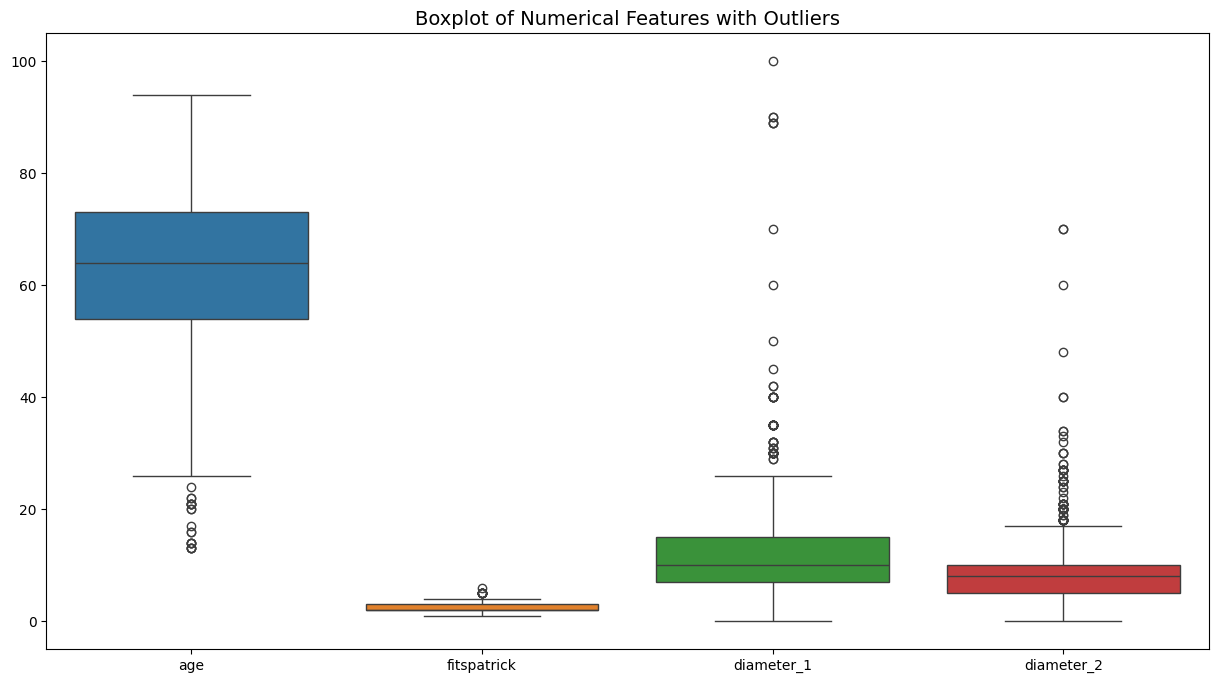

In [10]:
plt.figure(figsize=(15, 8))


sns.boxplot(data=df[['age', 'fitspatrick', 'diameter_1', 'diameter_2', 'changed']])

plt.title("Boxplot of Numerical Features with Outliers", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [11]:
for col in ['age', 'diameter_1', 'diameter_2']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [12]:
for col in ['age', 'diameter_1', 'diameter_2']:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))

In [13]:
df.sample(10)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1462,PAT_264,1368,False,False,POMERANIA,POMERANIA,84.0,False,FEMALE,False,...,10.0,BCC,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,PAT_264_1368_868.png,True
648,PAT_582,1363,True,True,POMERANIA,POMERANIA,60.0,False,FEMALE,False,...,10.0,BCC,TRUE,UNK,FALSE,UNK,FALSE,TRUE,PAT_582_1363_358.png,True
841,PAT_950,1804,False,True,POMERANIA,POMERANIA,53.0,True,MALE,True,...,6.0,BCC,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,PAT_950_1804_64.png,True
300,PAT_587,1117,False,True,GERMANY,ITALY,72.0,True,MALE,False,...,12.0,BCC,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,PAT_587_1117_880.png,True
1445,PAT_388,1590,False,False,ITALY,ITALY,51.0,False,FEMALE,True,...,8.0,BCC,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_388_1590_169.png,True
239,PAT_962,1823,False,False,POMERANIA,POMERANIA,52.0,True,MALE,True,...,3.0,BCC,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,PAT_962_1823_857.png,True
1559,PAT_898,1706,False,True,POMERANIA,POMERANIA,50.0,True,MALE,False,...,4.0,NEV,FALSE,UNK,FALSE,UNK,FALSE,FALSE,PAT_898_1706_496.png,True
191,PAT_82,125,False,False,POMERANIA,POMERANIA,71.0,True,MALE,False,...,13.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_82_125_365.png,True
993,PAT_722,1376,True,False,POMERANIA,POMERANIA,65.0,True,MALE,True,...,7.0,BCC,TRUE,UNK,TRUE,UNK,TRUE,TRUE,PAT_722_1376_280.png,True
1963,PAT_237,363,False,False,POMERANIA,POMERANIA,77.0,False,MALE,True,...,12.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,PAT_237_363_858.png,True


## EDA VISUALIZATION

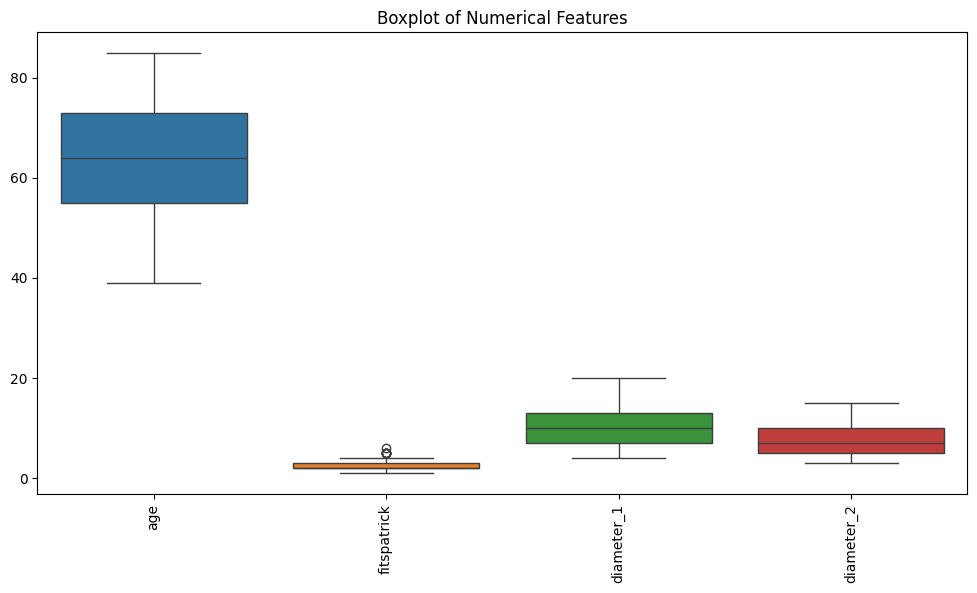

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('lesion_id')  
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()
# كود لوغارتمي استخدمته عشان لو فيه فروق كبيره ما بين القيم وعشان يوضح الرسمه اكتر

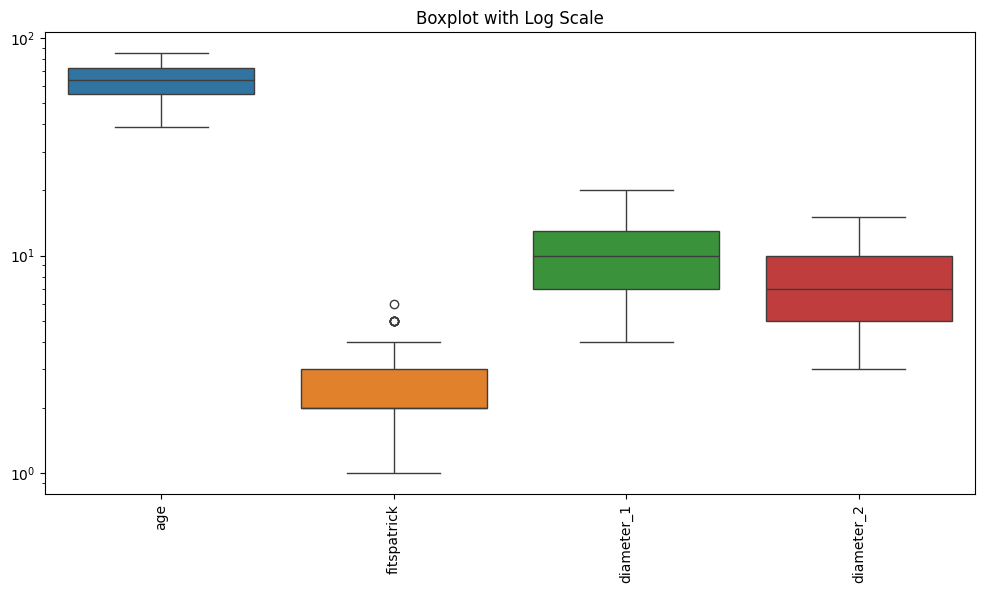

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.yscale("log") 
plt.xticks(rotation=90)
plt.title("Boxplot with Log Scale")
plt.show()

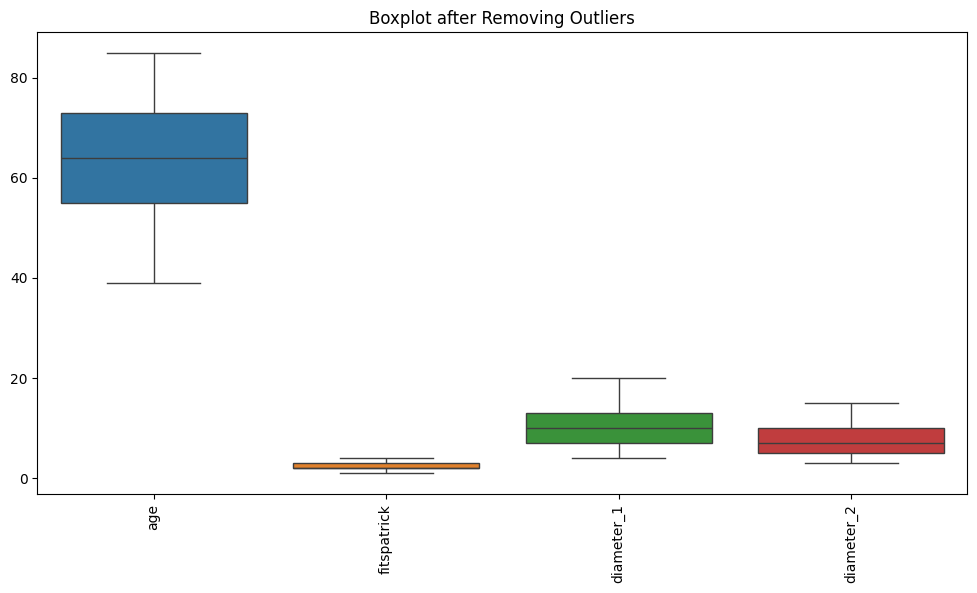

In [16]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
#الكود دا انا عملته عشان يشيل الداتا الي ملهاش لازمه الي ممكن تاثر علي الرسم
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot after Removing Outliers")
plt.show()

In [17]:
df.isnull().sum()

#كله صفر كدا مفيش اي missing data

patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64

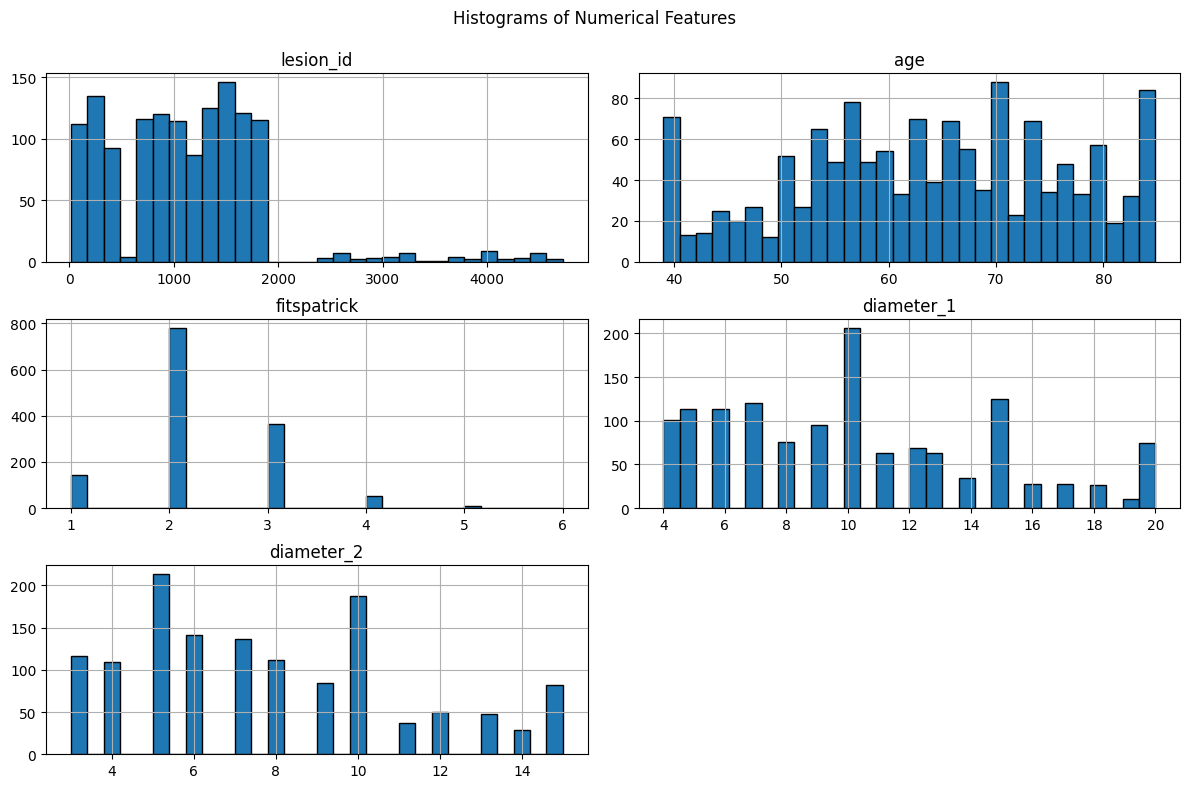

In [18]:

df.hist(figsize=(12, 8), bins=30,edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title

plt.suptitle("Histograms of Numerical Features")
plt.show()

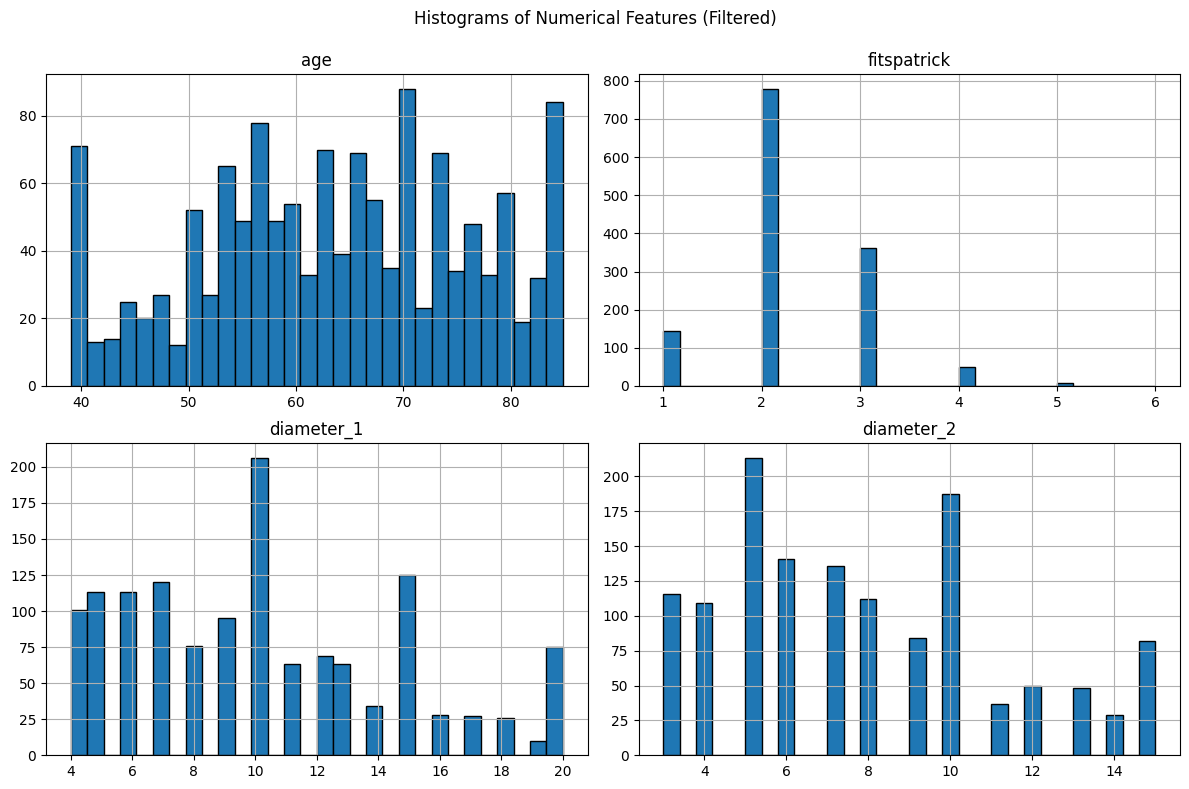

In [19]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col not in ['patient_id', 'lesion_id']]
df[numerical_columns].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
plt.suptitle("Histograms of Numerical Features (Filtered)")
plt.show()
#دا احسن شويه عشان شلت patient id & lesion id ملهومش لازمه غي الديجرام

In [20]:
df[numerical_columns].describe()

,age,fitspatrick,diameter_1,diameter_2
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,63.672470,2.254464,10.242560,7.764881
std,12.596994,0.721427,4.446164,3.387782
min,39.000000,1.000000,4.000000,3.000000
25%,55.000000,2.000000,7.000000,5.000000
50%,64.000000,2.000000,10.000000,7.000000
75%,73.000000,3.000000,13.000000,10.000000
max,84.850000,6.000000,20.000000,15.000000


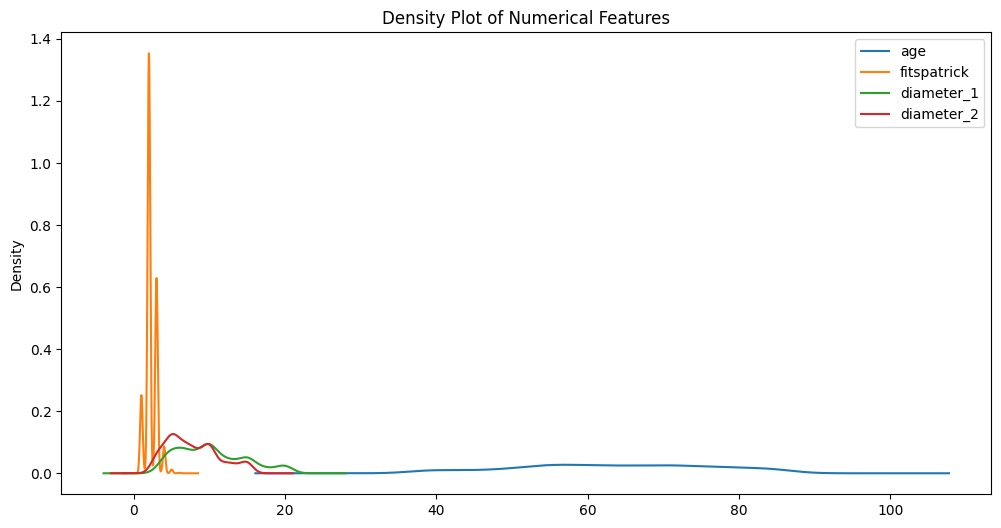

In [21]:
df[numerical_columns].plot(kind='kde', figsize=(12,6))
plt.title("Density Plot of Numerical Features")
plt.show()

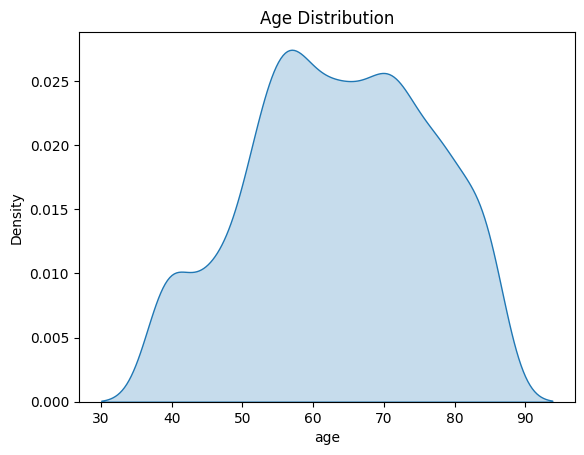

In [22]:
sns.kdeplot(df['age'], shade=True)
plt.title("Age Distribution")
plt.show()
#عشان نشوف شكل التوزيع

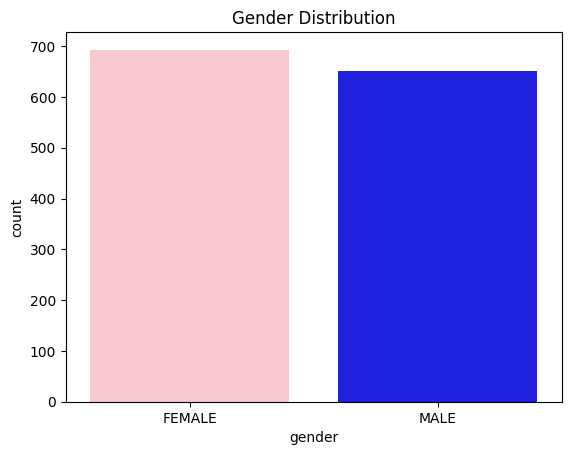

In [23]:

sns.countplot(x='gender', data=df, palette={'FEMALE': 'pink', 'MALE': 'blue'})
plt.title("Gender Distribution")
plt.show()

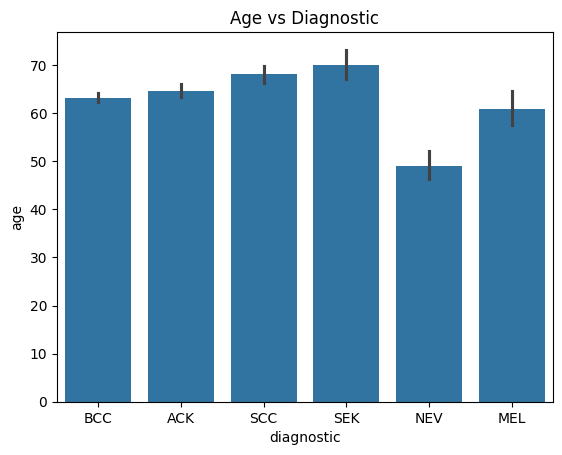

In [24]:
sns.barplot(x='diagnostic', y='age', data=df)
plt.title("Age vs Diagnostic")
plt.show()

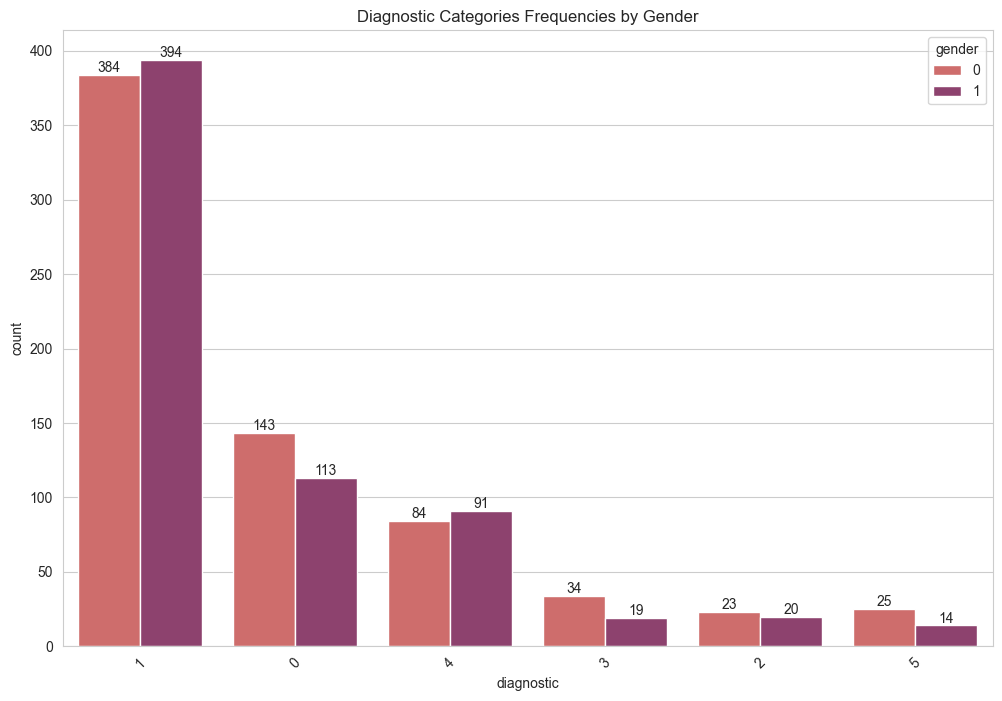

In [57]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='diagnostic', hue='gender', data=df, order=df['diagnostic'].value_counts().index, palette='flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Diagnostic Categories Frequencies by Gender')
plt.xticks(rotation=45)
plt.show()

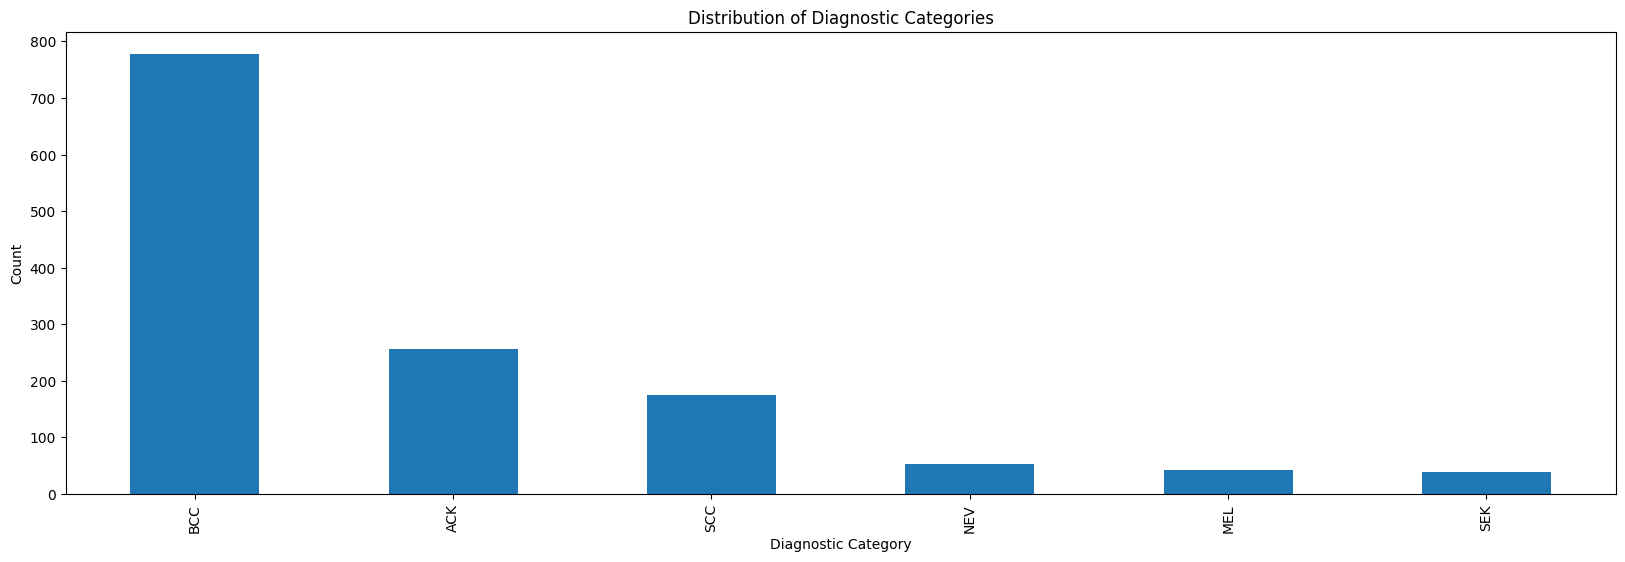

In [25]:

plt.figure(figsize=(20,6))
df['diagnostic'].value_counts().plot(kind='bar')
plt.title("Distribution of Diagnostic Categories")
plt.xlabel("Diagnostic Category")
plt.ylabel("Count")
plt.show()

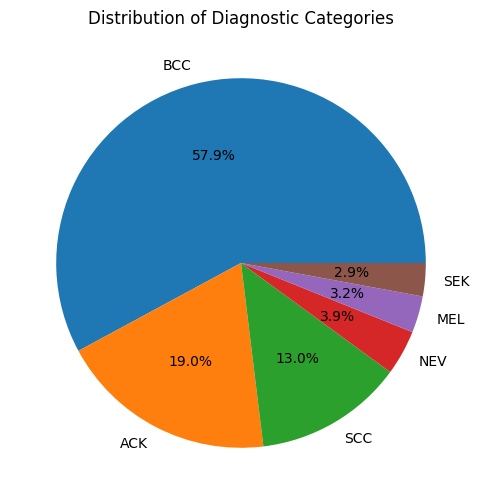

In [26]:
plt.figure(figsize=(20,6))
df['diagnostic'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of Diagnostic Categories")
plt.ylabel("")
plt.show()


# Preprocessing 

In [27]:
#check if the target variable (diagnostic) is imbalanced
df['diagnostic'].value_counts(normalize=True) * 100

diagnostic
BCC    57.886905
ACK    19.047619
SCC    13.020833
NEV     3.943452
MEL     3.199405
SEK     2.901786
Name: proportion, dtype: float64

In [28]:
#Encoder my target 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnostic'] = le.fit_transform(df['diagnostic'])
df['background_father']= le.fit_transform(df['background_father'])
df['background_mother']= le.fit_transform(df['background_mother'])
df['region']= le.fit_transform(df['region'])



In [29]:
df = df.replace({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0, 'UNK':0})

In [30]:
df['gender'] = df['gender'].replace({'MALE': 1, 'FEMALE': 0})


In [ ]:
# Columns to drop
drop_cols = ['patient_id', 'lesion_id', 'img_id', 'biopsed']

# Drop them from your dataframe
df = df.drop(columns=drop_cols)

In [32]:
# Separate features and target
X = df.drop(columns=['diagnostic'])  # Features
y = df['diagnostic']  # Target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
#Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)


# Machine Learning 

In [36]:
import xgboost as xgb
model1 = xgb.XGBClassifier()
model1.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
y_pred=model1.predict(x_test)

In [38]:
print("XGBoost F1 Score (macro):{:.2%}".format( f1_score(y_test, y_pred, average='macro')))
print("XGBoost Accuracy Score: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("XGBoost Recall Score (macro):{:.2%}".format(recall_score(y_test, y_pred, average='macro')))


XGBoost F1 Score (macro):55.40%
XGBoost Accuracy Score: 71.75%
XGBoost Recall Score (macro):55.37%


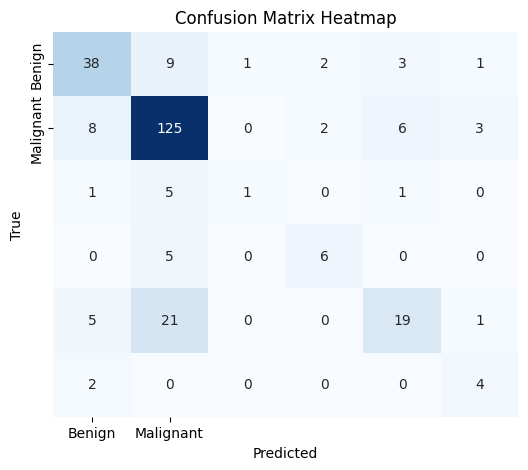

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.show()


In [40]:
model2=RandomForestClassifier()
model2.fit(x_train, y_train)


RandomForestClassifier()

In [41]:
y_pred2=model2.predict(x_test)

In [42]:
print("Random Forest F1 Score (macro):{:.2%}".format( f1_score(y_test, y_pred2, average='macro')))
print("Random Forest Accuracy Score: {:.2%}".format(accuracy_score(y_test, y_pred2)))
print("Random Forest Recall Score (macro):{:.2%}".format(recall_score(y_test, y_pred2, average='macro')))


Random Forest F1 Score (macro):60.23%
Random Forest Accuracy Score: 75.84%
Random Forest Recall Score (macro):54.99%


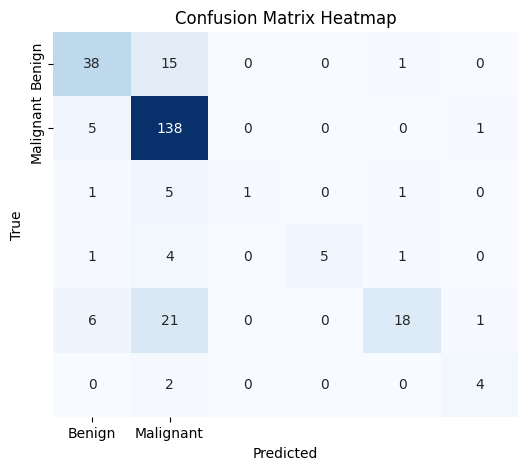

In [43]:
cm = confusion_matrix(y_test, y_pred2)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        54
           1       0.76      0.87      0.81       144
           2       0.50      0.12      0.20         8
           3       0.60      0.55      0.57        11
           4       0.66      0.41      0.51        46
           5       0.44      0.67      0.53         6

    accuracy                           0.72       269
   macro avg       0.61      0.55      0.55       269
weighted avg       0.71      0.72      0.70       269



# Deep Learning 

In [82]:
# Load the metadata
metadata = pd.read_csv('C:\DEPI\Depi Graduation project\metadata.xls')  

# Add the full image paths
metadata['path'] = metadata['img_id'].apply(lambda x: os.path.join('path_to_images_folder', x + '.jpg'))

In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Basic parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators (for training and validation)
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixels (0-1)
    validation_split=0.2,     # Split train/validation
    horizontal_flip=True,     # Data Augmentation
    rotation_range=20
)

train_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=None,
    x_col='path',
    y_col='diagnostic',           # Your label column
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=None,
    x_col='path',
    y_col='diagnostic',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


In [88]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model (optional at start)
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
num_classes = len(train_generator.class_indices)  # Get the number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [93]:
df.dropna(inplace=True)

In [97]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


ValueError: The PyDataset has length 0